In [7]:
import pandas as pd

**Importing and Preparing Data**

In [8]:
training=pd.read_csv('/content/tweet_emotions .csv')

In [9]:
training.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [10]:
training.isnull()

,tweet_id,sentiment,content
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
39995,False,False,False
39996,False,False,False
39997,False,False,False
39998,False,False,False


In [11]:
training.isna()

,tweet_id,sentiment,content
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
39995,False,False,False
39996,False,False,False
39997,False,False,False
39998,False,False,False


In [12]:
# importing the necessary libraries
import re, sys, os, csv

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
from io import StringIO

In [13]:
training["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [14]:
total = training.isnull().sum().sort_values(ascending=False)
percent = (training.isnull().sum()/training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
tweet_id,0,0.0
sentiment,0,0.0
content,0,0.0


In [15]:
training.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [16]:
training.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [17]:
training = training[pd.notnull(training['content'])]

In [18]:
col=['sentiment','content']
training=training[col]

In [19]:
training.columns

Index(['sentiment', 'content'], dtype='object')

In [20]:
training.columns=['sentiment','content']

In [21]:
## Droping duplicates and factorizing
training['sentiment_id']=training['sentiment'].factorize()[0]
sentiment_id_training = training[['sentiment', 'sentiment_id']].drop_duplicates().sort_values('sentiment_id')
print(sentiment_id_training)
sentiment_to_id = dict(sentiment_id_training.values)
id_to_sentiment = dict(sentiment_id_training[['sentiment_id', 'sentiment']].values)

      sentiment  sentiment_id
0         empty             0
1       sadness             1
3    enthusiasm             2
4       neutral             3
5         worry             4
14     surprise             5
16         love             6
21          fun             7
30         hate             8
40    happiness             9
112     boredom            10
147      relief            11
494       anger            12


In [22]:
training.head()

,sentiment,content,sentiment_id
0,empty,@tiffanylue i know i was listenin to bad habi...,0
1,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,sadness,Funeral ceremony...gloomy friday...,1
3,enthusiasm,wants to hang out with friends SOON!,2
4,neutral,@dannycastillo We want to trade with someone w...,3


**Implementing** **Stop** words

In [23]:
##IMporting the library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
##Assigning StopWords
stop=stopwords.words('english')
training['content'].apply(lambda x: [word for word in x if word not in stop])
for i in stop :
    training['content'] = training['content'].replace(to_replace=r'\b%s\b'%i, value="",regex=True)
training['content']=training['content'].str.replace(r'\s+', ' ')
training['content']=training['content'].str.lower()
print(training.head())

    sentiment                                            content  sentiment_id
0       empty  @tiffanylue know listenin bad habit earlier st...             0
1     sadness       layin n bed headache ughhhh...waitin call...             1
2     sadness                funeral ceremony...gloomy friday...             1
3  enthusiasm                           wants hang friends soon!             2
4     neutral  @dannycastillo we want trade someone houston t...             3


<ipython-input-24-9912bbd93772>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  training['content']=training['content'].str.replace(r'\s+', ' ')


In [25]:
## USing REGEX to clean y removing unwanted characters
def clean_tweet(tweet):

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

training['content'] = np.array([ clean_tweet(tweet) for tweet in training['content'] ])
print(training.head(10))

    sentiment                                            content  sentiment_id
0       empty  know listenin bad habit earlier started freaki...             0
1     sadness            layin n bed headache ughhhh waitin call             1
2     sadness                     funeral ceremony gloomy friday             1
3  enthusiasm                            wants hang friends soon             2
4     neutral          we want trade someone houston tickets one             3
5       worry              re pinging go prom bc bf like friends             4
6     sadness  i sleep im thinking old friend i want married ...             1
7       worry                                               hmmm             4
8     sadness                               charlene love i miss             1
9     sadness                               i sorry least friday             1


**Analysing the data**

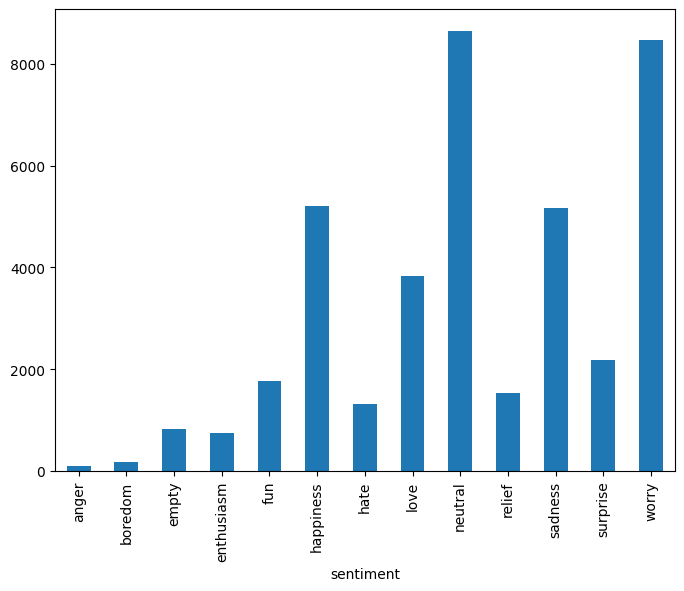

In [26]:
## understanding the frequency of sentiment
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
training.groupby('sentiment').count()['content'].plot.bar(ylim=0)
plt.show()

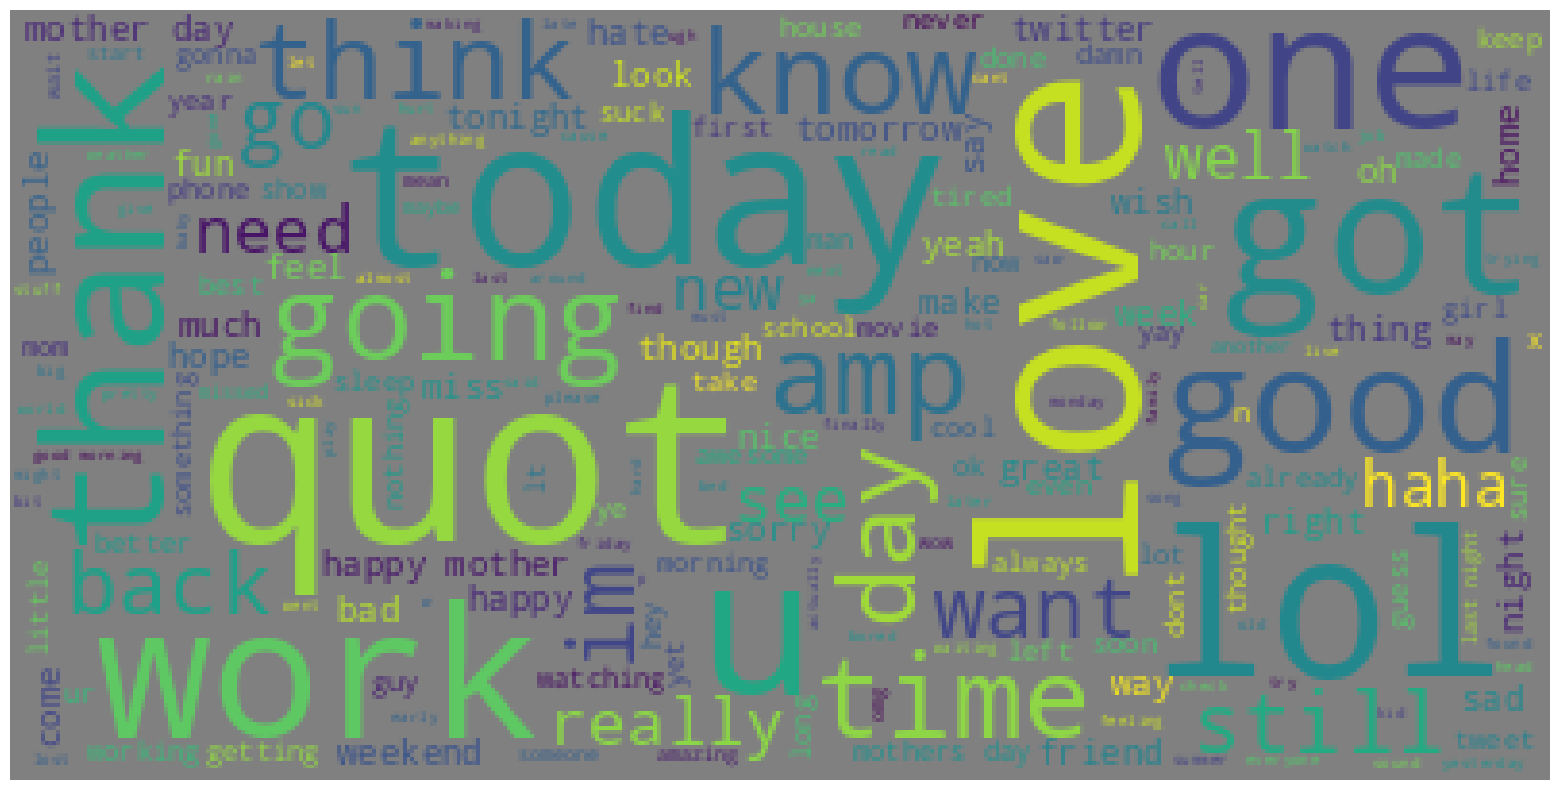

In [27]:
## Look into the data through wordcloud
import wordcloud
cloud = wordcloud.WordCloud(background_color='gray', max_font_size=60,
                                relative_scaling=1).generate(' '.join(training.content))

fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

**Vectorizing using TfitrainingVectorizer**

In [28]:
from  sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(training.content).toarray()
labels = training.sentiment_id
features.shape

(40000, 7873)

**Splitting the dataset and trying a prediction with MultinominalNB**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(training['content'], training['sentiment'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [30]:
from sklearn.feature_selection import chi2
N = 2
for sentiment, sentiment_id in sorted(sentiment_to_id.items()):
  features_chi2 = chi2(features, labels == sentiment_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(sentiment))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'anger':
  . Most correlated unigrams:
       . filthy
       . damned
  . Most correlated bigrams:
       . slow today
       . people work
# 'boredom':
  . Most correlated unigrams:
       . sooooooo
       . bored
  . Most correlated bigrams:
       . really bored
       . im bored
# 'empty':
  . Most correlated unigrams:
       . labor
       . bored
  . Most correlated bigrams:
       . ok ok
       . goodnight world
# 'enthusiasm':
  . Most correlated unigrams:
       . sings
       . grape
  . Most correlated bigrams:
       . wait start
       . weekend long
# 'fun':
  . Most correlated unigrams:
       . lol
       . fun
  . Most correlated bigrams:
       . good fun
       . need followers
# 'happiness':
  . Most correlated unigrams:
       . thanks
       . great
  . Most correlated bigrams:
       . happy star
       . good morning
# 'hate':
  . Most correlated unigrams:
       . sucks
       . hate
  . Most correlated bigrams:
       . hate rain
       . ugh hate
# 'love

In [31]:
print(clf.predict(count_vect.transform(["today is my fathers birthday"])))

['worry']


**Now testing several models**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: ignored

**The models under consideration are RandomForestClassifier,LinearSVC,MultinominalNB,LogisticRegression**

In [35]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, training.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

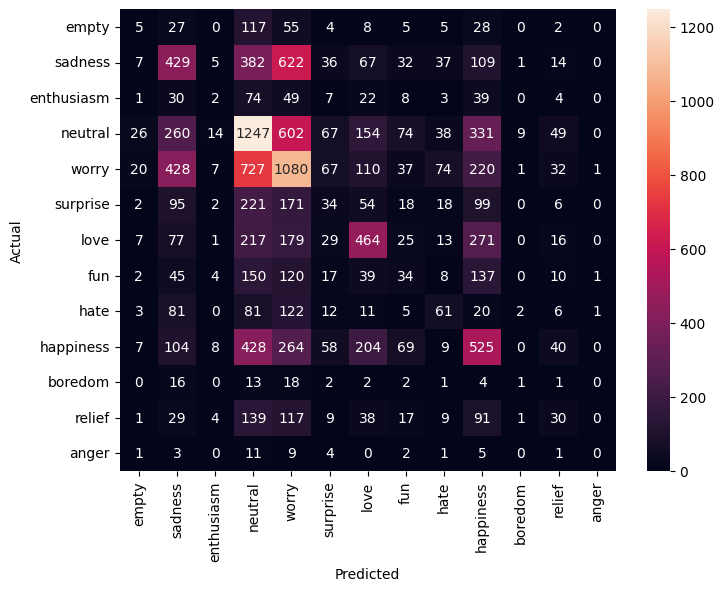

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_id_training.sentiment.values, yticklabels=sentiment_id_training.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
from IPython.display import display

for predicted in sentiment_id_training.sentiment_id:
  for actual in sentiment_id_training.sentiment_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_sentiment[actual], id_to_sentiment[predicted], conf_mat[actual, predicted]))
      display(training.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['sentiment', 'content']])
      print('')

'sadness' predicted as 'empty' : 7 examples.


,sentiment,content
3686,sadness,dagnamit latest power twitter update pants cli...
11353,sadness,lo siento i dint enough room
20674,sadness,please short stakc competition
13215,sadness,idance19 well yes lol chat earlier willing lea...
21804,sadness,looking new sms sending solution get 6 free sm...
1129,sadness,and i feel pain
14409,sadness,still direct message hell i complaining c ya 2...



'neutral' predicted as 'empty' : 26 examples.


,sentiment,content
34849,neutral,new location spam
20809,neutral,songs tays vid katy perry
27178,neutral,salt vinegar
13528,neutral,oh i know for cancelled 5pm oxford paddington ...
28144,neutral,whom yu wanna kill
14652,neutral,watching ripley believe not eating bad choice
35960,neutral,i trying decide i want go camping memorial day...
25750,neutral,so bored
27127,neutral,salt vinegar cheese onion make breathe smell l...
1218,neutral,t im sooooo bored right



'worry' predicted as 'empty' : 20 examples.


,sentiment,content
18626,worry,just found anne brother died unexpectedly 44 w...
14936,worry,foster still working
37863,worry,predicting heavyweight battle lakers cleveland...
5488,worry,sooo confused days but glad back lillestr m
27535,worry,cheese onion vinegar taste weird crisps englan...
22598,worry,im complaining
31395,worry,thanks i may narrowed location car hoping
16290,worry,hey bow yu comin baxx 2 thaa 614 miss yu hun 6...
29339,worry,i really like miller park bad cubs leading hop...
20575,worry,looks nights



'love' predicted as 'empty' : 7 examples.


,sentiment,content
10048,love,my stomach trying eat is time lunch yet looks ...
22642,love,haappy bank holiday 2 weeeeks aah
7520,love,thinking katy perry
28735,love,glad hear made i hear place used country looki...
36079,love,made coffee cake mom
30196,love,gifts
35625,love,awesome talk find true watching ruby community...



'happiness' predicted as 'empty' : 7 examples.


,sentiment,content
17353,happiness,rompes mis ilusiones con lo de thrasher haha
36692,happiness,yer hope competition doesnt end post video lol...
2673,happiness,thanks tip unfortunately major crash https sit...
21775,happiness,monday blues not today
21928,happiness,gandang mac un ah sure market mas mahal pa sya...
23189,happiness,capones island 2 days summer starting
27693,happiness,def cheese onion however back states 4 months ...



'empty' predicted as 'sadness' : 27 examples.


,sentiment,content
8198,empty,ok ok mam jus angry
21563,empty,ok just thought occured
2895,empty,i fall asleep didnt get see jonas brothers web...
22437,empty,next best thing bored bored able share people ...
8551,empty,off meeting lincoln square bummer free parking
23401,empty,the result working green black fingers
2749,empty,he mother favorite it hard telling
9666,empty,i wish i could go e3 oh well
5899,empty,ahh hate bbrush teeth hard make gums bleed
12116,empty,the little wormy labyrinth sadly passed away t...



'enthusiasm' predicted as 'sadness' : 30 examples.


,sentiment,content
937,enthusiasm,boring wanna go taekwando
12471,enthusiasm,last day work everyone making great
22026,enthusiasm,good luck mine 3rd day today
36581,enthusiasm,moving rod justin even persuaded sons join
10259,enthusiasm,leaving dont miss much tweetbeaks lt 3
19974,enthusiasm,congratulations guys finish month early booo
33945,enthusiasm,wowie wooie someone updated twitter without re...
2191,enthusiasm,tell thrilled i nosebleed first time ages over...
7574,enthusiasm,wish i
32189,enthusiasm,oh said sellout fluke it turns projector broke...



'neutral' predicted as 'sadness' : 260 examples.


,sentiment,content
38881,neutral,ado i think still one i one six years though m...
20963,neutral,if i loved i streak thru hood damnit i pumped
38992,neutral,reconnecting amadeus friends
2407,neutral,i wish i company
2464,neutral,super tired
...,...,...
6894,neutral,it friday but friday morning ugh
20763,neutral,wishing would get followers
7641,neutral,hey socialmediatv i new recorded show viewable...
13556,neutral,get music start playing clicked quot home quot



'worry' predicted as 'sadness' : 428 examples.


,sentiment,content
18247,worry,iphone quot opening downloaded apps quot thing...
20968,worry,i alreay feel hang soooo worth
12608,worry,i fat fingered coke machine i drinking diet pe...
5049,worry,fuck my arms feel like really sore jell
24086,worry,neglecting boy apparently i outro real life
...,...,...
16623,worry,missing nate usual tonight
5740,worry,sad day lakers please make happy w
3008,worry,my attempts writing tonight seem failing
18346,worry,chance might come back moncton miss show tonight



'surprise' predicted as 'sadness' : 95 examples.


,sentiment,content
8316,surprise,yes me i understand i mean i know hollywood th...
16790,surprise,nothing looking car im luck
39095,surprise,i pretty sure sort tweeting lose followers but...
6765,surprise,alright babes gt lt boo im gonna leave agaiiiiin
6295,surprise,on way back dublin omg didnt hit bed 530 sleep...
...,...,...
9877,surprise,my guitar herew yet feel like lost limb
16453,surprise,wishes call blah used easy move wtf happened
16517,surprise,i got overexcited pizza burned mouth
15034,surprise,tired



'love' predicted as 'sadness' : 77 examples.


,sentiment,content
2411,love,bummer tomorrow friday
3336,love,miss
29613,love,dinner fam i missed
3382,love,other people glasgow ones standing seats nights
11753,love,one wish would friend j work
...,...,...
23404,love,me monday end weekend but cannot escape i wish...
24636,love,go last final happiness
17441,love,getting pedicure i love my massage include leg...
11724,love,ahh dave canada included that okay still love ...



'fun' predicted as 'sadness' : 45 examples.


,sentiment,content
15109,fun,giesal dayyyyyy come join meee
5212,fun,and figuring watch middlesbrough games next ye...
38834,fun,honesty much sorry resist
16357,fun,going eat entourage probably fat e since closi...
11311,fun,so tonights tv viewing bgt hignfy reggie perri...
31691,fun,dude tried vegetarian thing lasted 2 months go...
19240,fun,got sold up
37274,fun,thanku cooking simple law u hve fun u make
17812,fun,the hangover that movie gonna hilarious wish c...
16216,fun,yahyan iaaaaaaaaaaaaan joking



'hate' predicted as 'sadness' : 81 examples.


,sentiment,content
9269,hate,stupid idiot ran stop sing almost killed car
8099,hate,got tired kitchen uninhabital swept mopped flo...
17312,hate,i william shatner version rocket man head 3 da...
16459,hate,how fuck 2833 songs fill ipod supposed hold 4000
15382,hate,when youre kawawa make kawawa cuz hate seeing ...
...,...,...
15990,hate,just i thought albany worse ao leave
1457,hate,hsbc savings apy dropped 1 55 sort feeling lik...
21644,hate,they unloading leopard tank next office window...
15536,hate,damn warm want stay back garden protect doggie...



'happiness' predicted as 'sadness' : 104 examples.


,sentiment,content
15301,happiness,really call ma wow reality check day lol
39022,happiness,oh nice i something nice next week going madri...
35832,happiness,man finishing quot operation anchorage quot su...
26948,happiness,i pondering lunch shane i think i already hear...
35129,happiness,nungguin sista law lahiran di rs asih kayaknya...
...,...,...
30457,happiness,winding love low key day
35549,happiness,i m feeling great
27994,happiness,death well i impressed technical skillz
33558,happiness,i take lots pics really pretty lots palm trees



'boredom' predicted as 'sadness' : 16 examples.


,sentiment,content
7721,boredom,bored would love someone talk
5868,boredom,weekends abouttttto suck
11916,boredom,home sick
12366,boredom,very bored all day one 2 talk 2 missing bf kis...
5554,boredom,i sooooooo bored textiles
11875,boredom,if sunny go beach im stuck home essays 20 degrees
8321,boredom,problem flash isnt gpu accelerated the atom 33...
7486,boredom,can believe gorgeous weather today amp i spend...
12549,boredom,man boring today tweeting how guys
9399,boredom,jus sittin da libray stupid computer wont let ...



'relief' predicted as 'sadness' : 29 examples.


,sentiment,content
33711,relief,uuuups today mother day sh i ve forgot work do...
1237,relief,missed awesome weather movie
8209,relief,ouch better get used i think 22 25 prime marri...
37834,relief,have slept 14 hours would longer working pm
23686,relief,back gym sorting inboxes
21541,relief,back working auditing away time make hard deci...
30547,relief,im officially done school til fall
26324,relief,came home early school catch lack sleep thanks
3488,relief,just finished work nd waiting freezing cold dr...
38584,relief,aw taxi man going fast meee



'neutral' predicted as 'enthusiasm' : 14 examples.


,sentiment,content
39490,neutral,www myspace com fashionisthenextcity check sta...
37045,neutral,should drank sugar milk coffee you coffee brain
24293,neutral,yes i feel i still got lots boxes it fun thoug...
28026,neutral,i want grape juice
36744,neutral,conan funny
26133,neutral,graphic design making business card im twitter
4775,neutral,deck building buddy missing action
28297,neutral,will dj little tune want www soompiradio com
20732,neutral,just took ic photo looks good
36512,neutral,www youtube com watch v 9ftuv3xmrn0



'worry' predicted as 'enthusiasm' : 7 examples.


,sentiment,content
4402,worry,yeah ill verizon two options right
17710,worry,i want panic
717,worry,is taking moment reflect i want annonymity bac...
30940,worry,at movies about watch star trek
18545,worry,stress mood
18486,worry,ok twitter near exciting i thought would
13843,worry,i say smudge i start calling people given mali...



'happiness' predicted as 'enthusiasm' : 8 examples.


,sentiment,content
4630,happiness,it nice inside
1466,happiness,can believe tomorrow night jay leno last episo...
24915,happiness,sitting audi joburg fashion week casting so ma...
29686,happiness,heart sings
33115,happiness,ok got nails done day sweet
28328,happiness,im fine also way early lol soo r ur dogs kut3 ...
38767,happiness,wake x x but tired on moment listing music mak...
27195,happiness,happy monday hope great week



'empty' predicted as 'neutral' : 117 examples.


,sentiment,content
36163,empty,is pantry
18813,empty,rumage around topless freezer find something e...
39543,empty,another prof pic
2249,empty,yeah i got issue signed confirmation email
8509,empty,eu com fome
...,...,...
4493,empty,reboot laptop factory settings losing everythi...
38130,empty,ur name also naina
28822,empty,laying bed boreddddd looking old cookbooks new...
28702,empty,nothing joined



'sadness' predicted as 'neutral' : 382 examples.


,sentiment,content
2299,sadness,back la las vagas nice trip nice food lose 100...
2396,sadness,sometimes i pillow sometimes i
25973,sadness,getting play golf kickin leadership team i fee...
10673,sadness,is msn nones
11356,sadness,work work me kind orc
...,...,...
15873,sadness,pollard never i banned court order
19920,sadness,gaah rain tomorrow
38470,sadness,emo moment many tears love family sorors
1271,sadness,as i leopold says hello



'enthusiasm' predicted as 'neutral' : 74 examples.


,sentiment,content
7895,enthusiasm,i know right i lead foot
35398,enthusiasm,watching movie playin computer
7849,enthusiasm,i want 5 already
34867,enthusiasm,super duber high klondike bar thee business
26165,enthusiasm,another monday less 2 hours work today
...,...,...
27182,enthusiasm,new project new mess
8510,enthusiasm,trying find something tonight
34417,enthusiasm,nice that sounds great let know
32799,enthusiasm,congratulation phil packer completing london m...



'worry' predicted as 'neutral' : 727 examples.


,sentiment,content
14655,worry,earth happened wentworth page devastated sure ...
9975,worry,java working hmph can upload photos facebook
2129,worry,inshalla devo i wont astor tonight
26284,worry,i might give another go
13665,worry,getting site transferred new server going quit...
...,...,...
4234,worry,hmm blog let post comment
3624,worry,thank you i almost forgot hoe type keyboard lo...
6962,worry,ditching missed i wish ruby boys would represent
18994,worry,hungryyyyyy



'surprise' predicted as 'neutral' : 221 examples.


,sentiment,content
36099,surprise,hey twitter hows going let us know day going
32912,surprise,im sure theres pamphlet somewhere oh foods pre...
29707,surprise,you welcome
21131,surprise,talking meeeeeeeeeeee
2970,surprise,woke sun and started rain
...,...,...
11441,surprise,i pre order
19711,surprise,i didnt win i continue try keep giving away fa...
4477,surprise,woke sound neighbor getting new roof
14326,surprise,oooooooooo said dancin home count



'love' predicted as 'neutral' : 217 examples.


,sentiment,content
38882,love,yes getting sky back wednesday waiting weeks
19356,love,i sooooooooooooooooo need to see u im on some ...
1446,love,i mind sam but i liked kate i like chris he sm...
35990,love,dashboard modest mouse first modest mouse blip...
19010,love,ya i never play i basically using ps3 days
...,...,...
24188,love,anytime
38815,love,i surely vote
27120,love,hah yeah i hear good luck today
21007,love,thankyou short stack bringing second sydney sh...



'fun' predicted as 'neutral' : 150 examples.


,sentiment,content
16734,fun,ok time head urban outfitters see catches eye ...
33053,fun,cleaning roooooooooom continue playing dsi
35936,fun,thank opendns saving comcast crappy dns server...
21233,fun,yep rock station okc check profile real quick
24496,fun,rofl rofl have fun
...,...,...
22013,fun,lol grey skies far eye see 20 yards
33753,fun,band hawaii sublime sound sublime haters move ...
32571,fun,sweet i jaycee one letter er i think just d
31528,fun,haha yay crust tend little weird im super bore...



'hate' predicted as 'neutral' : 81 examples.


,sentiment,content
3403,hate,mailbox already 2 hours
14030,hate,school guy like talking girl cant stand ppl so...
26481,hate,yeah yeah less degenerate current occupants u ...
14601,hate,ah tummy hurts damn starbucks sugar chocolate ...
19383,hate,i saw us postal hiring i done filling pre appl...
...,...,...
5759,hate,fuck ipod freezing need
11876,hate,everyone vote for miley cyrus for the mtv movi...
6368,hate,damn need replace macbook display chf 670 work...
39000,hate,i relate frustration i ruined wp blog many tim...



'happiness' predicted as 'neutral' : 428 examples.


,sentiment,content
31896,happiness,hahaha bob marley one
28971,happiness,i discern request hulu support excellent idea
39236,happiness,did back pakistan
39458,happiness,ang cho con hamster p p th c b ng c ch b v o b...
27217,happiness,thanks mandy what good sister that may true un...
...,...,...
36392,happiness,12 days ca get see paniniii
4296,happiness,deh wish deal bought macbook december least go...
35912,happiness,going help lancey cook
28851,happiness,had nice pre mother day dinner now cocktail re...



'boredom' predicted as 'neutral' : 13 examples.


,sentiment,content
12229,boredom,sitting tax collectors office getting ready wr...
36628,boredom,today boring harry potter ftw
7465,boredom,i want go home d i like stay work alone
14558,boredom,ugh waiting interminable
5572,boredom,moving rain fun last day hamptons
3740,boredom,im bored rc goin maintenance
6868,boredom,the gigantic initial inertial get oneself work...
8059,boredom,ok one hour im still waiting im losing patience
4058,boredom,think finale i thought kind cheap way
20385,boredom,todo cleaning apartment keeps making mess oh y...



'relief' predicted as 'neutral' : 139 examples.


,sentiment,content
29616,relief,laying lyndi drive way drinking tea listenin m...
34512,relief,back home palmdale bed mommy
21015,relief,saw advert attics to eden tv today 9 99 hmv i ...
20236,relief,not really work yea kinda
36740,relief,hey girl yeah i thanks bunch i started downloa...
...,...,...
7735,relief,ran facebook quizzes lol grocery shopping work...
34347,relief,we voted you 760
21087,relief,likes cheerios scones morning
25795,relief,end far start



'anger' predicted as 'neutral' : 11 examples.


,sentiment,content
24321,anger,hello enjoy london watch hackneys they mental
6475,anger,shout moms wakin prematurely preciate
14840,anger,and could empire dirt i amp e dad i freezing f...
34095,anger,dude you hax0r 1 you put final cut pro tell st...
6895,anger,very arduous task accomplish work stuff alread...
33361,anger,serious shit steve send pictures call you know...
4890,anger,smh your whin comment
10727,anger,which denomination i library everything blocked
32501,anger,kickass day full seaworld retarded 15 year old...
8251,anger,motherfuck qw



'empty' predicted as 'worry' : 55 examples.


,sentiment,content
22400,empty,i see moms twitter tweets i know gonna worth ir
32855,empty,i know keep wild dog else able situation use m...
2331,empty,follow you ruin twitter experience
29234,empty,the winds nearly blew outfield
14944,empty,why gets difficult i try change finally
24199,empty,so internal alarm clock wake 630am i another h...
16458,empty,ugh i definitely speak soon
13013,empty,sorry dont think crying fake dont see dont thi...
31074,empty,oh yah angel came harrassed tried break house ...
17741,empty,pinkapple not much weekend off knox shortly am...



'sadness' predicted as 'worry' : 622 examples.


,sentiment,content
10131,sadness,feel bad kid sick
17020,sadness,miss need talk keep screwing lovee u
10758,sadness,holy wow i think i could slept day soooo tired
7238,sadness,at work head hurts little due neck i hate i sl...
7879,sadness,127 poor baby need aloe nope sorry hints
...,...,...
12143,sadness,my blackberry got fatty battery guess kinda bo...
3838,sadness,tonight bad night
700,sadness,tummy ache
2446,sadness,i looking forward seeing raleigh fan 10 years ...



'enthusiasm' predicted as 'worry' : 49 examples.


,sentiment,content
10394,enthusiasm,ok 4 needs hurry come wtf i wanna go hooooommm...
18436,enthusiasm,is hot tummy ache sleep lots chem tomorro leas...
11400,enthusiasm,work agh i really need go days go i add schedule
424,enthusiasm,so i need make lot money tomorrow
26510,enthusiasm,aiyo poor thing eh nevrmine la night still young
37540,enthusiasm,moving great especially lots help
4048,enthusiasm,take baby vet today
8073,enthusiasm,i really wish someone would make groupchat the...
15482,enthusiasm,i wish i disneyland watching star trek like pe...
22952,enthusiasm,gotta catch em



'neutral' predicted as 'worry' : 602 examples.


,sentiment,content
10913,neutral,uh oh
11667,neutral,i m a jump off a bridge not really but i want ...
17971,neutral,called called i think answer haha
28691,neutral,lol thirsty
4589,neutral,i feel like i gonna make year
...,...,...
26605,neutral,hope u alright final
13746,neutral,last scheduled corn dog oc shift
14407,neutral,scary cape guy
11422,neutral,heat makes hard revise



'surprise' predicted as 'worry' : 171 examples.


,sentiment,content
26870,surprise,ahhaha oh embarassment stop reading
35077,surprise,when i heard quot no one quot alicia keys like...
34907,surprise,my ex colleagues shaanxi kept boasting native ...
21341,surprise,plans seeing bank holiday raining well raining...
16180,surprise,i saw red audi highway i sped uo hoping my loss
...,...,...
16679,surprise,rain oh well still friday
12399,surprise,tom back town
4379,surprise,unfortunately usually goes in answer yesterday...
33956,surprise,happy mothers day tried i gonna wear breakfast...



'love' predicted as 'worry' : 179 examples.


,sentiment,content
12434,love,addict me okay i admit i need help but i writi...
39205,love,always seem know exactly right thing say thank...
23629,love,i fell austin taura hanafiah even morreee shoo...
21134,love,found old familiar feeling
151,love,thanks neemah i gonna soooo close izzy yet far
...,...,...
20806,love,long weekend looking forward end may
1978,love,ok i shed tears watching preview next weeks me...
28441,love,hi everyone hoping good week
27824,love,mike bring even tho really late get 5am morning



'fun' predicted as 'worry' : 120 examples.


,sentiment,content
23878,fun,kay planted garden last week ive got check
31511,fun,those dog pic rolf the one snow stuck quot loo...
23090,fun,ooooh dream husband lol d i saw stranthorpe ma...
34112,fun,did know call duty scenario game called quot n...
27910,fun,pilot co pilot baby burnin cannot stress much ...
...,...,...
8221,fun,i vacuumed entire house three times screw vacuums
12381,fun,cleaning room found took 2w2v insisted paying ...
36552,fun,this wild derby trnds3trs
26683,fun,starting work week little ac newman



'hate' predicted as 'worry' : 122 examples.


,sentiment,content
11259,hate,ugh nothing valley seriously gotta move
6562,hate,haha k stop if going turn bitching section ohw...
17219,hate,hmm maybe i time i really react worst
3038,hate,anyone got remedies neck pain haven able turn ...
8398,hate,john making wear mask gloves work cause i sick...
...,...,...
17003,hate,i got dropped froma coupla ppl following damn ...
2935,hate,think may time lemsip soon cold really sucks
11164,hate,mad as hell someone stole my pink amp black le...
9173,hate,return sideways fuck meds bills



'happiness' predicted as 'worry' : 264 examples.


,sentiment,content
39864,happiness,really long exposures tripod looking viewfinde...
31908,happiness,getting night great mood
23582,happiness,rankin yep buddy long time talk hows things se...
8644,happiness,goodbye sex city let hurry give mi cuz paper w...
24695,happiness,reading book instead revising thinking lunch h...
...,...,...
28811,happiness,i feeling better i something tummy
24960,happiness,at school everyone first classs day 18 days
23300,happiness,on way home i think
16928,happiness,aw sorry ur day sucked did u see post abt car ...



'boredom' predicted as 'worry' : 18 examples.


,sentiment,content
32266,boredom,listening maylene wondering cant i pull many c...
8827,boredom,just woke feels damn lazy time work damnit
2674,boredom,fo shizzle bored wanna go something wish went ...
2235,boredom,my brother woke help homework i happy
345,boredom,agree work double shift
13114,boredom,ya know today sucks raining amp possibility ma...
13198,boredom,oh need new work shoes broke one
12044,boredom,ditto friend bored oops i exciting problem
7791,boredom,tired sick all time
28048,boredom,good morning twitters i soooo tired i really n...



'relief' predicted as 'worry' : 117 examples.


,sentiment,content
32454,relief,totally best part day studying haha ok really ...
5372,relief,days yesterday probably today i wish i taken t...
37396,relief,good hear bck let stupid rumours put u long ur...
406,relief,finished 8 hours texas life insurance ce tonig...
12724,relief,at vet sick dog
...,...,...
34515,relief,gone 6 tea bags call obbsessed say thirsty
39811,relief,morning finally got stream media pc ps3 via wi...
26759,relief,still watchin boston legal tho cracks 2 scrubs...
2341,relief,im sorry



'anger' predicted as 'worry' : 9 examples.


,sentiment,content
14684,anger,gah i left glasses work reading giving headach...
14112,anger,never anything good school rabbit life cycle d...
1377,anger,i tried dye hair got blond chunk front middle ...
10734,anger,bout go work wicked sunburn chest
12590,anger,thingsmummysaid mummy told never wnted mummy e...
13439,anger,know lender yea people definitely sucked butt ...
4511,anger,the toaster oven fault now i going look like i...
7767,anger,studying bullshit econ test
17480,anger,just found parents putting dog tomorrow mornin...



'sadness' predicted as 'surprise' : 36 examples.


,sentiment,content
5061,sadness,i ran eclipse mints
28149,sadness,i didnt know starwars day
12842,sadness,nofair my bk uhura nero left
15872,sadness,well i tell i marry like maybe i stuck situati...
14378,sadness,it gonna happen
14394,sadness,really cant take
4855,sadness,sorry i unsociable i loading stock shop mums m...
14344,sadness,really good definitely 12 so many people getti...
10290,sadness,oh the sun gone
15179,sadness,believe i leaving place tomorrow



'enthusiasm' predicted as 'surprise' : 7 examples.


,sentiment,content
7529,enthusiasm,i found 5 minutes ago mama said speech still s...
36160,enthusiasm,sm i look do live centre glasgow i born bellsh...
2325,enthusiasm,wow away 4 stupid lap top shop still hope ever...
21582,enthusiasm,lex ah hey alexa heard right looking forward c...
36262,enthusiasm,aiden knives may 12th www myspace com aiden ex...
4942,enthusiasm,hey beatweetup badge required tonight just rea...
12008,enthusiasm,glad 2hear kerry didnt know u gmtv morning amp...



'neutral' predicted as 'surprise' : 67 examples.


,sentiment,content
18163,neutral,eagle why ship japan
29759,neutral,i would notice
29768,neutral,heard st true imax shot 1828x1556 blown 4096 s...
27886,neutral,r one mine potential winner i think could quit...
22312,neutral,hey ian may 7 din ako maybe see cuz diff schoo...
...,...,...
6404,neutral,yawn at hotel moving tomorrow
30335,neutral,right pull chair welcome
1421,neutral,i ship october
25378,neutral,i try best



'worry' predicted as 'surprise' : 67 examples.


,sentiment,content
3351,worry,i believe did give reason
38835,worry,wtf polyvore enjoy though
4277,worry,met shortest line ever fcb tunapuna tellers di...
8175,worry,have irma vep rehearsals no really
18143,worry,hang fone getting hot
...,...,...
22989,worry,dump boyfriend find much much better man girl ...
15464,worry,traumatizing moment childhood dogs massacred b...
36110,worry,hearing surprising news bestfriend sis you tel...
32431,worry,wow 9 30



'love' predicted as 'surprise' : 29 examples.


,sentiment,content
32131,love,happy mother day i lovee mami
12654,love,awwww love simon bossy quot find time somewher...
28850,love,geesh 5 days straight boy nside joint lol head...
26523,love,i def if anyone leaves room second follow he r...
20481,love,have huge block snack chocolate tis calling na...
10666,love,met hes live goes clubbing places lol dont get...
36923,love,your interesting girl so much potential many ways
37598,love,my brother making banana shake yesterday made ...
21788,love,oh really hopefully good one i trying get atte...
36500,love,sleep woke check see cold hot love mom



'fun' predicted as 'surprise' : 17 examples.


,sentiment,content
33375,fun,whoa twilight board game aaahaha
36268,fun,swords make everyone sexy oh harold
23628,fun,green day bomb xx
12605,fun,omg little girl bgt
32607,fun,sounds good taylor kellie tour together pure g...
28763,fun,whaaaaaaaaaat thas hot b super nice
32041,fun,watching fireworks bay bridge
14364,fun,good luck oh i playing inthe mixed knockout we...
17923,fun,mabrook inta wain wil diet wain 3indi funoon
30734,fun,go canada made nikkie payne 1 comic well soo y...



'hate' predicted as 'surprise' : 12 examples.


,sentiment,content
16109,hate,wow really sucks
2931,hate,beckiie x omg going see another reason live de...
16703,hate,there always one joykill crowd haters
37581,hate,can wait live it ages away still i plan i goin...
34766,hate,drinking shitload water get rid hangover train...
11766,hate,this chair comfortable
22813,hate,while driving u come across aggressive driving...
28679,hate,wow god whole ui sooo much snappier it respons...
35795,hate,and really censoring nin com i really hesitate...
17883,hate,i m really desappointed



'happiness' predicted as 'surprise' : 58 examples.


,sentiment,content
16069,happiness,jlh lol that special kind magic though and see...
31331,happiness,okay new jonas episode awesome
21245,happiness,wow five years congrats
22958,happiness,okayyy read cause i feel special haha
24424,happiness,goes one n smirker cheers dave aka jak aka bes...
24155,happiness,aww really great blog thanks mention hi form p...
33399,happiness,ahhhh soo smart thanks schooling thoughts have...
24129,happiness,off wedding
13690,happiness,wow constantly ranting love genghis grill neve...
35043,happiness,congrats i highly doubt u buyer remorse u want...



'relief' predicted as 'surprise' : 9 examples.


,sentiment,content
12665,relief,omg hollie that well sad watch see simon well ...
5812,relief,thinking wow i survived freshman year mission ...
16793,relief,just realized friday b c party i get go racing
25565,relief,anyone plan revolutionizing real estate week
25794,relief,on way birmingham sewing van punk
35553,relief,cool van helden
20717,relief,wow easy thank
9675,relief,there laptop dead lucky i got fone lol
31037,relief,phase 2 success self discovery vital phase 3 m...



'empty' predicted as 'love' : 8 examples.


,sentiment,content
28008,empty,gooooood morning loves
15898,empty,dang plant thorny bushes ouch kitty hugs today
34286,empty,happy mother day mommy grandma haha ily
11859,empty,i love daddy i want go house today
19647,empty,oh thank alllll put ur follow friday new follo...
33805,empty,thanks follow thing join interests
16007,empty,i want like horatio caine
30667,empty,about get crazy



'sadness' predicted as 'love' : 67 examples.


,sentiment,content
26354,sadness,hiya missed what
30658,sadness,watching quot that thing you do quot comcast m...
10663,sadness,biggest food fight mosh pit ever miss across s...
31265,sadness,paige92 amen clearly know able say you wonderf...
11247,sadness,demi you were so pretty with you re bangs and ...
...,...,...
10451,sadness,didnt get hug today
24773,sadness,illy note book quot from one geek another keep...
519,sadness,sniff sniff take care ravels hopefully chattin...
35866,sadness,lol birmingham 1st love time move good morning



'enthusiasm' predicted as 'love' : 22 examples.


,sentiment,content
20345,enthusiasm,really really wants go see coraline
36091,enthusiasm,back later happy mother s day to all the mothe...
33778,enthusiasm,happy mother day mom twitter land
33998,enthusiasm,snugglin tila
3991,enthusiasm,duuuude tim said making red vs blue animated s...
29126,enthusiasm,decided best stay tonight lady shall pittsburg...
24096,enthusiasm,goodmorning world
23852,enthusiasm,trackflashback quot i believe in a thing calle...
39165,enthusiasm,happy bday
26892,enthusiasm,why kiss feet people kick anything want mornin...



'neutral' predicted as 'love' : 154 examples.


,sentiment,content
28230,neutral,h ok know daisy love and seen yet oh lord
39431,neutral,happy mothers day
28020,neutral,i love stereosound hq headphones
37339,neutral,fancy sunday lunch the albion game
23774,neutral,goodmorning everyone
...,...,...
9915,neutral,voting since like four days ago think told fri...
5987,neutral,bad migrane need go dancing tonight not good c...
30440,neutral,tis sharonp
39136,neutral,happy mother day mom



'worry' predicted as 'love' : 110 examples.


,sentiment,content
27229,worry,mind like time
36341,worry,always told keep sucking something like fruit ...
3387,worry,bob dylan it aint me babe important day today ...
14862,worry,never usa it would great cruise tour next year...
5709,worry,hey honey bear don goooooooo puhleeezeee
...,...,...
11970,worry,i love day 26 video questionable say i liked
6938,worry,i ready baby 3 tomorrow growing fast
24075,worry,goodmorning world
27455,worry,changedd background picnik



'surprise' predicted as 'love' : 54 examples.


,sentiment,content
3015,surprise,getting dressed go granny another day twitting
5706,surprise,xdxdxd crazy little thing didn t get train hug
35434,surprise,happy mother day tweeting mothers
37230,surprise,new followers pretty cool peeps check em
20395,surprise,oh i love just noting remix kids seem
6230,surprise,gogowww come deals like houston
31341,surprise,awww wish younger sis older one bet younger si...
25747,surprise,is universal treat
32561,surprise,hey look twitter very kewl
28723,surprise,i ok i think i take attitude mothers day inven...



'fun' predicted as 'love' : 39 examples.


,sentiment,content
12037,fun,dude kitty well absolutely special haha specia...
28027,fun,haul vid photo slideshow i fun
2682,fun,i saying goodbye sydney days hello rapeville i...
26119,fun,aww you are the sunshine of my life bob larry ...
34266,fun,sweet spice girls sing along w good friends
31595,fun,dancing around cleaning house loving sunday far
30972,fun,love black eyed peas many memories watching hulk
29998,fun,stephs grad party gr8 shoved cake face watchd ...
24787,fun,come lovely fans number 14 local pop charts le...
39783,fun,rey nah really gradually ptfe tape goes 0 1 mm...



'hate' predicted as 'love' : 11 examples.


,sentiment,content
19770,hate,my moms season 3 weeds got burnt family friend...
23285,hate,gooooodnight fully gave english pride prejudic...
15097,hate,donbt like peel prawns also dont like going sh...
31753,hate,im excited pics send urs w lt 3 photoshop lol
7107,hate,flip flops menace i cut one feet ouchies
18814,hate,college work sucks much
33107,hate,i dont care gets mad i like speaking mind im a...
9401,hate,swolen shitt boo hoo
21318,hate,boys stupid throw rocks
24998,hate,back lovely land north



'happiness' predicted as 'love' : 204 examples.


,sentiment,content
13917,happiness,i actually envy even though i already seen it ...
31169,happiness,happy mother day ms pat carey
28029,happiness,in whin park swings victory mine right
23968,happiness,great stuff wait hear
36555,happiness,sl happy sunday
...,...,...
30290,happiness,operation happy mom success
30946,happiness,lmao dimples naww thats cute ok ill try rememb...
32777,happiness,congratulations mom tomorrow buenas noches
28860,happiness,ooh nice score jojo



'relief' predicted as 'love' : 38 examples.


,sentiment,content
9052,relief,an hour walking hot weather satisfied hurting ...
28116,relief,thanx showin luv
32217,relief,awww thanks jon my 9yr old told i sleep clean ...
24788,relief,the best bike best guy i love ducati sound i t...
10300,relief,i love burp everytime try almost throw
16283,relief,glass cold water meditate bit lt 3
29225,relief,excuse love cavs west even though i share
14482,relief,home china amp back work
37313,relief,phone acting crazy today missed tweeties updat...
23777,relief,blip not misconstrued qs last night convo song...



'sadness' predicted as 'fun' : 32 examples.


,sentiment,content
5032,sadness,lolol trying morning sadly couldnt
34363,sadness,the star trek imax 3d huge screen still worth ...
16989,sadness,would want clone unboxed new 24 quot imac last...
3230,sadness,guitar lessons tomorrow i wake early
15351,sadness,lulu put scottish accent britains got talent m...
15814,sadness,wishing i going up tonight wait tomorrow
27096,sadness,lol
34275,sadness,strongly agrees jason wolverine hugh jackman s...
9285,sadness,nothing lol
19357,sadness,having bad day actually cd keeps spirits lifted



'enthusiasm' predicted as 'fun' : 8 examples.


,sentiment,content
21321,enthusiasm,getting hair cut tomorrow later today i say ex...
38545,enthusiasm,i sleep missed fun hey dg lets play another ga...
29818,enthusiasm,everyone please welcome new friend kari warm f...
26570,enthusiasm,florida nice
35223,enthusiasm,quot the weather outside weather quot hahah ma...
30732,enthusiasm,north im boomin lol fucc club dog rather count...
3816,enthusiasm,hi i sorry telling let meet with meirizka you ...
19009,enthusiasm,yeah i getting ready go get pizza then nothing...



'neutral' predicted as 'fun' : 74 examples.


,sentiment,content
25051,neutral,17 tonight
13517,neutral,it lol none
22854,neutral,got lot things hehe daya sa mga walang ginagawa
17082,neutral,boooo i bet nice wallet
29693,neutral,lol i see
...,...,...
20493,neutral,hey mia go bed deangeloredman live gt
30818,neutral,politicians celebs lottsa fun some fun actuall...
34089,neutral,sykes lose gigs gaining better ones frankly be...
14071,neutral,jus got done swimming soon ima need stay outta...



'worry' predicted as 'fun' : 37 examples.


,sentiment,content
31690,worry,bundy 3 days warm weather come
17097,worry,it 00 03 i wrecked i m hungry amp i get early ...
26726,worry,yup coke blades b annnd need blades make x soo...
36785,worry,lester pitcher red sox
26222,worry,oh hahahahahaha seriously tell wait staff look...
28887,worry,tomorrow mother day i need get crap together s...
25486,worry,yeah yesterday i turned 16 my parents rented h...
13345,worry,heyy sis 1 year 5 months still want walk
20353,worry,yes im 50 full dvr 98 like 3 days ago lol i sw...
16095,worry,come chile band everything happens far away lo...



'surprise' predicted as 'fun' : 18 examples.


,sentiment,content
4413,surprise,partying tonight
5723,surprise,i want play
8855,surprise,did yall know kid drowned trying swim bottom o...
9742,surprise,hd full
33245,surprise,omg patron 1ofmy favs im jealous icant 10 5 ma...
36587,surprise,rather random
19236,surprise,yeahh two times stood next special times
7167,surprise,playing hooky work go see up i hope get along
26062,surprise,says numbers good left white blood cell count
39194,surprise,goodmornin soon saw ur pic reminded embarresin...



'love' predicted as 'fun' : 25 examples.


,sentiment,content
26542,love,cant wait prom prom party friday
39569,love,welcome new catvampees enjoy ride
23765,love,bamboozle amazing i met taking back sunday
5379,love,35mins 1hr 20mins google wave demo looks lot f...
36805,love,hey anna i bet look cute ur blushing
31077,love,cant wait see boy tomorrow
12053,love,i gave following she seems really nice clutter...
38771,love,marko got fight outside roseland tonight rathe...
37682,love,my home made red velvet cupcakes pretty damn g...
9857,love,thank and i care look face



'happiness' predicted as 'fun' : 69 examples.


,sentiment,content
27440,happiness,i lol
20479,happiness,sounds pretty cool great job man
34327,happiness,i definitely write i look forward article re5 ...
28109,happiness,morning every1 giveaway mod kid emma pattern a...
29609,happiness,lol yourock
...,...,...
23215,happiness,welcome new followers also
250,happiness,chillin roomies can wait zombie clwn cr its go...
23529,happiness,bmth also want attend tafe gig i asked mum sou...
30559,happiness,lol twitter addicts



'relief' predicted as 'fun' : 17 examples.


,sentiment,content
31510,relief,very tired day awesomeness cake now time bit s...
4672,relief,ohh yeahh showcase said artist outta town keep...
1132,relief,i fun tonight i leave brandi carlile dallas to...
29222,relief,eating nothing drinking water watch movie join
25815,relief,drinking tea eating choc chip cookies going he...
18579,relief,at natalies finished work had amazing peanut b...
33010,relief,got prom fun prom text
19710,relief,mosque mini golf haha i tied 1st it looks like...
3311,relief,awww gnight haha
34523,relief,funtime lot fun but finally done



'sadness' predicted as 'hate' : 37 examples.


,sentiment,content
13679,sadness,stupid twitter i faceless
27810,sadness,intel gfx driver situation much better recent ...
9374,sadness,better people know going chiodos tonight right...
9829,sadness,no pool today stupid weather
15066,sadness,charter pissing rest internet access blog exce...
7408,sadness,didnt research traffic beautiful system twitte...
7695,sadness,bored work ridiculous saturday going suck clas...
10715,sadness,awww didnt pass speech
595,sadness,hate
8361,sadness,beag i hate cat pee



'neutral' predicted as 'hate' : 38 examples.


,sentiment,content
13949,neutral,but i really want sporebat pet
13642,neutral,ftsk l listened fucking pissed called friends ...
3607,neutral,home well hate workin
18455,neutral,see traffic northbound that commute
28503,neutral,whats though sound bit boiler
10711,neutral,damn it
11358,neutral,ohhhh that reminds me i know one send toothpaste
27267,neutral,omg i would sooooo make dis show number one n ...
32888,neutral,icky bitches piss i sooo glad arent icky bitch
12767,neutral,hollowbabeshere comes utter shite bgt lt i com...



'worry' predicted as 'hate' : 74 examples.


,sentiment,content
1717,worry,morning panic clicked link opened browser fire...
20890,worry,i stuck boo jeeeez shoot
6274,worry,trying get swimmer ear go away
18009,worry,hate storms
19693,worry,going kill t t wasted hundreds download realis...
...,...,...
6701,worry,i bird living so i find ways kill damn things ...
7276,worry,oh god terrible
14376,worry,been job hunting days media non media jobs no ...
14614,worry,tummy monster hates



'surprise' predicted as 'hate' : 18 examples.


,sentiment,content
24105,surprise,someone tell tonight quot 2 states qld pissed ...
33133,surprise,that sure that i intentionally turn thought pr...
14529,surprise,at shakas againn no 2 dollar salads
29619,surprise,it already damn
17666,surprise,there huge bulldyke eyein
21664,surprise,staff rooms it intersting see k12 faces every ...
554,surprise,relisting fees complete sale sucks
30802,surprise,wtf lmao just got hit head bloody balls
15568,surprise,u ignoring gah
4027,surprise,mitchell never opera think



'love' predicted as 'hate' : 13 examples.


,sentiment,content
13948,love,cant wait get home hate job
31195,love,the power i seeeeeeee i love storms
39111,love,mcflyy finaly my chance has came to kill you m...
32745,love,soooooooooo win powerball jackpot impose formi...
2018,love,really want marry leighton meester damn take eyes
5396,love,i think everyone hates me on here lol
17287,love,i know hhrs
9841,love,love new phone hate didnt get netbook today
18373,love,mobile let stop thinking x
4557,love,ditched school hate im taking huge dump hurts ...



'fun' predicted as 'hate' : 8 examples.


,sentiment,content
24590,fun,woo got fast mobile broadband connection
34842,fun,damn ive gotten much packed already lmao well ...
29016,fun,i love humor i reworded like saying quot group...
10514,fun,speedbumps suck u gotta piss
39635,fun,tysm made uploaded one okay lol im looking thr...
28183,fun,about lock in getting better staying
35212,fun,addicted pet society app facebook
25887,fun,no profile pic bio updates lots following foll...



'happiness' predicted as 'hate' : 9 examples.


,sentiment,content
5438,happiness,shopping tonight cant wait lucky bastard alrea...
23091,happiness,time snuggle bed electric blankie
31847,happiness,ok mother fucking duet hysterical lol
3368,happiness,ah nice back bike commute although three days ...
9759,happiness,i know i saying fuck i horny hell
30507,happiness,the black canyon seriously best fusion food ar...
5246,happiness,ooh lovely ridiculous amount revision left
22802,happiness,jammin to capital in my garde xx
31488,happiness,everyone going hometown show excited get go th...



'relief' predicted as 'hate' : 9 examples.


,sentiment,content
14282,relief,grrr my internet running next wed least i def ...
19989,relief,congratulations guys finish month earlier booo
18304,relief,just got work
24286,relief,going finish last assignment then go to bed
34910,relief,grr naplan finished commerce amp geo exams goo...
24057,relief,i sales training couple papers they paid bills...
3631,relief,back london now catching tv sleeping day
39790,relief,ill call home phone home phone dinner tho coz ...
23527,relief,ha first request sending paper copy thesis



'empty' predicted as 'happiness' : 28 examples.


,sentiment,content
2307,empty,just watched mall cop wasn funny bad i guess i...
25611,empty,cant thank you enough who nitin between
35307,empty,haha i know why early
37678,empty,good morning
19720,empty,oh yeah
2268,empty,even know sporting social enterprise means
16697,empty,yeeeah d lmao dentists nice espesh decide old ...
4783,empty,oooh lush cant sunbathe burn way easily even s...
21701,empty,hehe it nice
21020,empty,having hectic day travelling pj uniten back pj...



'sadness' predicted as 'happiness' : 109 examples.


,sentiment,content
10973,sadness,crappy music radio
33750,sadness,i single handedly killed 4 flies crane fly hai...
11655,sadness,ugh amp didnt hit me up ok lol jk what were u ...
15263,sadness,i found giveaway i wish i would known sooner w...
2107,sadness,overwhelming finally catching cousin bff since...
...,...,...
9978,sadness,hahah except haley gets hit car yay leyton
16540,sadness,soooooooooo glad learn farrells ice cream parl...
32008,sadness,dr hook awesome
28377,sadness,rothlisberger that fucking awesome bookmark



'enthusiasm' predicted as 'happiness' : 39 examples.


,sentiment,content
31333,enthusiasm,got lot shopping done today really excited bou...
3514,enthusiasm,miss justin timberlake voice want make new album
39836,enthusiasm,yes that sounds like great idea message lj
32504,enthusiasm,think going go lobby get either starbucks perh...
23347,enthusiasm,nice that would feat the husband clocking mile...
31256,enthusiasm,find spot team wink wink
23405,enthusiasm,i excited ashley matt within next half hour re...
23617,enthusiasm,i mo nudge better watch
38659,enthusiasm,hour til lunch wait ima go mcd
34896,enthusiasm,u gonna host saturday night live waiting like ...



'neutral' predicted as 'happiness' : 331 examples.


,sentiment,content
18569,neutral,matt weiters first bat fly rf
36391,neutral,thank u
21787,neutral,cool i realise
36876,neutral,oh happy mother day countries day mother day m...
17958,neutral,think texting i read lol figured html
...,...,...
39067,neutral,time play drums
23378,neutral,found decently priced breakfast yet hope
23585,neutral,good morning
36668,neutral,cordon lol welcome



'worry' predicted as 'happiness' : 220 examples.


,sentiment,content
38813,worry,happy birthday great grandmother bad news good...
5112,worry,e3 2009 first time i get see g4tv e3 coverage ...
10946,worry,grizzly bear concert tonight can wait will col...
37618,worry,i rather sit bench friendly psychiatric patien...
4280,worry,spent whole day shopping aiza really like shop...
...,...,...
32053,worry,haha always good jam
15865,worry,i figure empire puzzle stuck 36
3150,worry,hayles yer must sure tho caught brother got worse
28266,worry,scii fi effects definitely look silly doubt wo...



'surprise' predicted as 'happiness' : 99 examples.


,sentiment,content
36296,surprise,i good thx u u
23400,surprise,definitely blast past
37160,surprise,thanks madam lucky coz wonderful dog sooo cute
23230,surprise,jd turk make laugh scrubs
26719,surprise,congrats tax refund those always nice
...,...,...
23570,surprise,morrrning time school time learn
36798,surprise,colossus lol cheers mate yeah went well thanks
30067,surprise,says good morning everyone once happy mother d...
29161,surprise,ah i see cool dude



'love' predicted as 'happiness' : 271 examples.


,sentiment,content
29913,love,wonderful day going sleep well tonight
12294,love,im probs gonna wait comes dvd x
1316,love,waah you aberdeen f k i miss best gigs
25236,love,hey yay thanks wow ur page awesome
25926,love,i know haha night
...,...,...
38703,love,exchange story gone yaaaay on sweet charity
36191,love,really brilliant
33761,love,we twitter reunion would awesome meet lol iwon...
11004,love,oh yes quite nice photoshop liep zojuist vast ...



'fun' predicted as 'happiness' : 137 examples.


,sentiment,content
31403,fun,live new york justin timberlake
27817,fun,back great weekend buffer
14305,fun,i know i hoping meet tonite amp i found min ag...
28898,fun,night cookers dad
37366,fun,and i back sooper dooper extra bharia extra dh...
...,...,...
27354,fun,come estonia i know epic horses hehe good trai...
16262,fun,fun far nothing like festival altho cider afte...
30265,fun,soooo sleepy gotta finish game lol gettt cavs ...
31616,fun,awesome congrats completing i believe cycled d...



'hate' predicted as 'happiness' : 20 examples.


,sentiment,content
21268,hate,going smack
14763,hate,birthday tomorrow doing jack shit weekend
26205,hate,happy birthday month i get day deserve whole m...
11888,hate,surrounded student houses barbecues playing sh...
10851,hate,excited eat wartermelon bought day terrible sweet
19138,hate,home finally hungry needs food mad cause i mig...
3127,hate,britain shit
39337,hate,hockey fukin good fuck hole xd
302,hate,think may broke toe bar tonight thanks drunk g...
4302,hate,the sun is shining lt the sky is facking blue ...



'relief' predicted as 'happiness' : 91 examples.


,sentiment,content
24461,relief,thank
21232,relief,working resume listening rain enjoying circus boy
35041,relief,laundry loud music relaxing
24658,relief,nice weather looks like going rain delhi
39843,relief,smile everything worked
...,...,...
15927,relief,work yesss super hungry
15579,relief,way get maggie moos peanut butter galaxy home ...
7628,relief,w thank
6355,relief,i know dude runs making jenny watch conversati...



'neutral' predicted as 'boredom' : 9 examples.


,sentiment,content
11542,neutral,stuck traffic 91 way costa mesa
15829,neutral,watching southpark another 20 minutes
9894,neutral,so full great lunch stuck traffic
27703,neutral,math left day dmv
1383,neutral,baby help math
23912,neutral,dear mikey robins nah heard
18438,neutral,ahhhhh work
1086,neutral,really realy want netbook mrr techno lust sucks
36314,neutral,nessiah yeah i in fifteen minutes



'sadness' predicted as 'relief' : 14 examples.


,sentiment,content
35336,sadness,music soothes soul
25595,sadness,dreary monday morning i slept like crap give b...
13359,sadness,science class right urgh stupid project wanna ...
64,sadness,ok passengers one alive dead know til end cry
1676,sadness,not good start day left money home so hot day ...
10252,sadness,2 days without sleep migraine i thought life p...
7718,sadness,pinkpop weekend amp i got no tickets meaning b...
36,sadness,radio yeah s feel funny cause slept enough wok...
24055,sadness,working 4 day weekend aah well another one com...
39634,sadness,yep trying beat cold winter morning swim alway...



'neutral' predicted as 'relief' : 49 examples.


,sentiment,content
8513,neutral,i must fool twitterland get retweet sadsville
26494,neutral,month i put 2 week notice little week ago last...
39852,neutral,lol fine i go
27097,neutral,new private acc will use close twitter friends
31263,neutral,i m also watching movie friends twilight
19371,neutral,finishing washing dishes
26636,neutral,getting porn ones mentioned girls seem loss
23796,neutral,sounds like challenge i see would useful able ...
35664,neutral,i take look tomorrow definitely want graph man...
4390,neutral,dont want though wish slept heather woke got w...



'worry' predicted as 'relief' : 32 examples.


,sentiment,content
7562,worry,ha the potential loss fingers think get po at ...
28892,worry,problem superstars always deliver huge files m...
38664,worry,on another note geodefense easy onwards medium...
10714,worry,washing the dishes s its so hard 2 me
34653,worry,theres nothing like pillow
8756,worry,haha great slept horribly last night
29375,worry,feeling better hon
6085,worry,slovakian country side refreshing change compa...
19434,worry,graveyard charged card twice one correct total...
2400,worry,ummm last night i dm said quot good quot question



'surprise' predicted as 'relief' : 6 examples.


,sentiment,content
31275,surprise,so glad i finally done finals
27259,surprise,ah i thought management fiat fiat oh well and ...
34322,surprise,where do get wonderful toys
8905,surprise,thought i check home 10 minutes ago downloadin...
14892,surprise,yes nice one he believe guy kicked max he week...
23313,surprise,nash ba dum tish you win



'love' predicted as 'relief' : 16 examples.


,sentiment,content
36777,love,4 15 finally home city time head sleep goodnig...
5133,love,booo finally i could get back my internet went
2415,love,thanks just used therm pry was like concrete b...
37000,love,back cycling 20 miles virtually traffic free r...
28745,love,i lt 3 owl city
5167,love,watching midsomer murders totally love show sh...
35677,love,haha im jewish love one
31302,love,watching snl gahhhhh will forte soooooo funty
15248,love,thanks warm welcome we make plans arrival time...
27832,love,thanks followfriday recommendation we actually...



'fun' predicted as 'relief' : 10 examples.


,sentiment,content
25639,fun,woop rehearsing songs yep sounds even enough
23309,fun,well alright but dollhouse still fricking awes...
28221,fun,hey peoples dont hate grounded haha im sat eat...
31664,fun,these days looking better better betterrrrrrrr
29587,fun,quot then it happened quot sorry watching movi...
29990,fun,finally get hands laptop ate biggest burrito d...
32710,fun,thanks got tired bleaching the um bangs yeah a...
29552,fun,tired gunna go bed soon first time i online to...
4706,fun,its already hot outside thank goodness car ama...
35831,fun,2008 sorry race charity fun i one fun



'hate' predicted as 'relief' : 6 examples.


,sentiment,content
11284,hate,ooo goddddd vodafone trouble network
6977,hate,had hottest stressiest day work f area manager...
2794,hate,was woken screamin lil nefuew
11232,hate,phone disconnects internet right middle uber a...
4311,hate,u dirrrrrty why oh i pick hawks i figured i ne...
6389,hate,so i got day cuz i hundreds things i woke f ck...



'happiness' predicted as 'relief' : 40 examples.


,sentiment,content
9422,happiness,haha aware one contracts uti training work 8 4...
32598,happiness,hey everyone i mixed first single quot why r u...
5966,happiness,finally way home
31175,happiness,foooood yummy whose washing dishes not me rofl
28945,happiness,lights concerns lol stay safe
33769,happiness,i proud dr house detoxing his amber hallucinat...
32086,happiness,thanks mine bad made card mom nice nap finishe...
38314,happiness,finally home tomorrow day 2 quot amazing quot
25936,happiness,finally getting ready see msn ahaha fun fun fun
18243,happiness,7pm i leaving desk and last week i safari my t...


In [40]:
model.fit(features, labels)

LinearSVC()

In [42]:
from sklearn.feature_selection import chi2

N = 2
for sentiment, sentiment_id in sorted(sentiment_to_id.items()):
  indices = np.argsort(model.coef_[sentiment_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(sentiment))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'anger':
  . Top unigrams:
       . damned
       . filthy
  . Top bigrams:
       . people work
       . slow today
# 'boredom':
  . Top unigrams:
       . realy
       . tubes
  . Top bigrams:
       . know today
       . love talk
# 'empty':
  . Top unigrams:
       . labor
       . cc
  . Top bigrams:
       . ok ok
       . just came
# 'enthusiasm':
  . Top unigrams:
       . sons
       . escape
  . Top bigrams:
       . weekend long
       . hope today
# 'fun':
  . Top unigrams:
       . mraz
       . bamboozle
  . Top bigrams:
       . don miss
       . need followers
# 'happiness':
  . Top unigrams:
       . woohoo
       . sunset
  . Top bigrams:
       . happy juddday
       . woot woot
# 'hate':
  . Top unigrams:
       . hate
       . ripped
  . Top bigrams:
       . crap today
       . work morning
# 'love':
  . Top unigrams:
       . loving
       . love
  . Top bigrams:
       . happy mommy
       . thing quot
# 'neutral':
  . Top unigrams:
       . wa
       . gut
  

In [44]:
texts = ["I am going to die.",
         "Sorry for your loss.",
         "Today is world fathers day.",
         "I completed my course."]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_sentiment[predicted]))
  print("")

"I am going to die."
  - Predicted as: 'worry'

"Sorry for your loss."
  - Predicted as: 'sadness'

"Today is world fathers day."
  - Predicted as: 'sadness'

"I completed my course."
  - Predicted as: 'happiness'



In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,
                                    target_names=training['sentiment'].unique()))

              precision    recall  f1-score   support

       empty       0.06      0.02      0.03       256
     sadness       0.26      0.25      0.25      1741
  enthusiasm       0.04      0.01      0.01       239
     neutral       0.33      0.43      0.37      2871
       worry       0.32      0.39      0.35      2804
    surprise       0.10      0.05      0.06       720
        love       0.40      0.36      0.38      1299
         fun       0.10      0.06      0.08       567
        hate       0.22      0.15      0.18       405
   happiness       0.28      0.31      0.29      1716
     boredom       0.07      0.02      0.03        60
      relief       0.14      0.06      0.09       485
       anger       0.00      0.00      0.00        37

    accuracy                           0.30     13200
   macro avg       0.18      0.16      0.16     13200
weighted avg       0.27      0.30      0.28     13200



Using Keras

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [2]:
df = pd.read_csv('/content/tweet_emotions .csv')
df.head()
df = df[pd.notnull(df['content'])]
col=['sentiment','content']
df=df[col]
df.columns
df.columns=['sentiment','content']

In [3]:
def clean_tweet(tweet):

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

df['content'] = np.array([ clean_tweet(tweet) for tweet in df['content'] ])
print(df.head(10))

    sentiment                                            content
0       empty  i know i was listenin to bad habit earlier and...
1     sadness  Layin n bed with a headache ughhhh waitin on y...
2     sadness                     Funeral ceremony gloomy friday
3  enthusiasm                wants to hang out with friends SOON
4     neutral  We want to trade with someone who has Houston ...
5       worry  Re pinging why didn t you go to prom BC my bf ...
6     sadness  I should be sleep but im not thinking about an...
7       worry                                       Hmmm is down
8     sadness                        Charlene my love I miss you
9     sadness                     I m sorry at least it s Friday


In [4]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['content'].values)
X = tokenizer.texts_to_sequences(df['content'].values)
X = pad_sequences(X)

In [5]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 36, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 36, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 13)                2561      
                                                                 
Total params: 513,361
Trainable params: 513,361
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(26800, 36) (26800, 13)
(13200, 36) (13200, 13)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7


In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))